In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
#reading the csv in a dataframe
df_microbiome = pd.read_csv('https://cgi.luddy.indiana.edu/~yye/b565/data/hmp-otu/T2D_abundance.csv', delimiter='\t', index_col=0)

In [3]:
#getting first few records of the data set for better understanding of the data set
df_microbiome.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


The data set consists of the microbiome profiles of 344 people. Each of them can either have type 2 diabetes or not. The data set has 572 attributes that store the relative abundance of different bacterial specie found in the stool sample collected from each person. There is an extra attribute called 'Class' that identifies if a person has type 2 diabetes or not.

In [4]:
df_microbiome['Class'].value_counts()

n      174
t2d    170
Name: Class, dtype: int64

The column named class is the column that tells if a person has type 2 diabates (t2d) or not (n).

In [5]:
#dropping the label attribute i.e. class from the features
features = df_microbiome.columns.drop('Class')

# Separating out the features
x = df_microbiome.loc[:, features].values

In [6]:
# normalizing the features
x = StandardScaler().fit_transform(x)

In [7]:
x.shape

(344, 572)

In [8]:
#checking if the normalized data has a mean of 0 and a standard deviation of 1
np.mean(x),np.std(x)

(3.70134526017494e-18, 1.0)

In [9]:
#converting normalized features into a tabular format
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [10]:
df_normalised_microbiome = pd.DataFrame(x,columns=feat_cols)

In [11]:
df_normalised_microbiome.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571
339,-0.172028,-0.133409,-0.097711,-0.053995,-0.170735,-0.162213,-0.064003,-0.077094,1.904060,-0.180177,...,-0.053995,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,-0.053995,-0.053995,-0.053995,-0.053995
340,-0.172028,-0.133409,-0.097711,-0.053995,1.032614,-0.162213,-0.064003,-0.077094,0.344249,10.584991,...,-0.053995,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,-0.053995,-0.053995,-0.053995,-0.053995
341,-0.172028,-0.133409,-0.097711,-0.053995,0.437220,-0.162213,-0.064003,-0.077094,-0.286620,-0.180177,...,-0.053995,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,-0.053995,-0.053995,-0.053995,-0.053995
342,-0.172028,-0.133409,-0.097711,-0.053995,-0.170735,-0.162213,-0.064003,-0.077094,6.253368,-0.180177,...,-0.053995,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,18.520259,-0.053995,-0.053995,18.520259
343,-0.172028,-0.133409,-0.097711,-0.053995,-0.170735,0.184829,-0.064003,-0.077094,6.575479,-0.180177,...,-0.053995,-0.072415,-0.053995,-0.058945,-0.053995,-0.064157,-0.053995,-0.053995,-0.053995,-0.053995


The tail() method above shows all the features after normalization

# Principal Component Analysis

PCA is a technique through which it is possible to visualize data of higher dimensional space in a lower dimensioanl space. Here dimesions are nothing but features. It is a linear dimensionality reduction technique that preserves the essential parts that have more variation of the data and removes the less essential parts that have less variation of the data. It orthogonally transforms the set of values of possibly correlated variables into a set of values of linearly uncorrelated variables that are known as principal components.

In [12]:
#inititing PCA
pca_microbiome = PCA(n_components=2)
principal_components_microbiome = pca_microbiome.fit_transform(x)

In [13]:
#creating a dataframe that will contain the principal component values for all 344 people
df_principal_microbiome = pd.DataFrame(data = principal_components_microbiome, columns = ['principal component 1', 'principal component 2'])

In [14]:
df_principal_microbiome.tail()

,principal component 1,principal component 2
339,1.395944,0.914460
340,-0.391192,-0.201518
341,-0.622662,-0.349646
342,4.654240,0.846717
343,2.848271,0.740266


In [15]:
#checking the eplained_variance_ratio
print('Explained variation per principal component: {}'.format(pca_microbiome.explained_variance_ratio_))

Explained variation per principal component: [0.05774328 0.0388078 ]


The principal component 1 holds 5.77% of the information where as the principal component 2 holds 3.88 % of the information. While projecting data from 572 dimensions to 2 dimensions, 90.35% of the information was lost. 

In [16]:
#replacing the current indexes with numerals for plotting assitance
df_microbiome.index = [i for i in range (0,344)]

<Figure size 432x288 with 0 Axes>

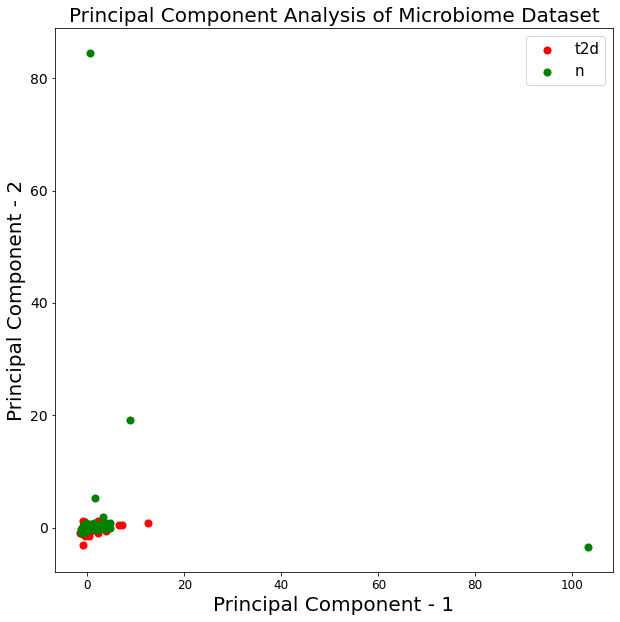

In [17]:
#plotting the visualization of 344 samples along the principal component 1 axis and the principal component 2 axis
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Microbiome Dataset",fontsize=20)
targets = ['t2d', 'n']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_microbiome['Class'] == target
    plt.scatter(df_principal_microbiome.loc[indicesToKeep, 'principal component 1']
               , df_principal_microbiome.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Based on the above graph, following can be observed:
1. The two classes i.e 'n' and 't2d' are not linearly separable when projected in a 2 dimensional space.
2. 'n' class is slightly more spread out than the 't2d' class

### Conclusion for PCA on this data set
Following are the concluding points for PCA on this data set:

1. The microbiome dataset had a huge number of dimensions i.e. 572 dimensions. It would have been extremely difficult to analyze the data set and also, plotting so many attributes would have been cumbersome. When a threshold value is surpassed by the number of dimensions, then the accuracy decreases. This leads to the Curse of Dimensionality.
2. To deal with the above stated issue, the approach of Principal Component Analysis helped in the reducing the dimensionality of this data set from 572 dimensions to 2 dimensions.
3. The principal component 1 holds 5.77% of the information where as the principal component 2 holds 3.88 % of the information. While projecting data from 572 dimensions to 2 dimensions, 90.35% of the information was lost. Hence, we were not able to retain almost all of the variance.
4. This shows that PCA was not a good approach for this data set.
5. Cluster of people can be seen according to the status of their disease i.e. red for people who have type 2 diabetes and green for people who do not have diabetes. However, the clusters are linearly not separable as they almost overlap with each other in the 2D space. A few users from the green cluster (no diabetes) are scattered in the 2D space.

# T-Distributed Stochastic Neighbouring Entities (t-SNE)

T-Distributed Stochastic Neighbouring Entities (t-SNE) is a probabilistic technique to visualize the high dimensional data sets. It is also a technique for dimensionality reduction, but it is a non-linear one. Two distributions play a role here. One of them measures pairwise similarities of the input objects and the other one measures pairwise similarities of the corresponding low-dimensional points in the embedding. This way, mapping of the multi-dimesnional data to a lower dimensional space is carried out by t-SNE where it attempts to find patterns in the data by identifying clusters based on similarity of data points with multiple features. Also, the input features are not identifiable after the output of t-SNE is generated.

In [33]:
#inititing t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 344 samples in 0.000s...
[t-SNE] Computed neighbors for 344 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 4.096676
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.079315
[t-SNE] KL divergence after 300 iterations: 1.920517


In [34]:
print(tsne_results)

[[-1.91185150e+01 -1.89176106e+00]
 [-9.71925640e+00 -7.44784927e+00]
 [-1.22214365e+01  3.47420464e+01]
 [ 1.05993853e+01 -4.73490524e+00]
 [-2.35809364e+01  9.48207474e+00]
 [ 1.39957151e+01  1.48932666e-01]
 [ 1.66269646e+01 -1.01559811e+01]
 [ 2.96729603e+01  1.77691727e+01]
 [ 1.14390497e+01 -1.02019796e+01]
 [ 1.11752915e+00 -2.05319061e+01]
 [-6.58061361e+00  3.11337972e+00]
 [ 7.32310104e+00  1.08202438e+01]
 [ 7.82887030e+00 -4.82892609e+00]
 [ 2.14675522e+00 -7.10813999e-01]
 [-8.40469551e+00  3.09542217e+01]
 [ 2.64928379e+01 -1.79057539e+00]
 [ 2.01152515e+01 -9.35359859e+00]
 [ 4.49722719e+00 -2.69949222e+00]
 [-2.71331310e+00  2.18109875e+01]
 [ 1.12372708e+00 -1.89271605e+00]
 [ 7.66723454e-01 -1.08770084e+01]
 [-2.96504664e+00 -3.76563191e+00]
 [ 2.49503478e-01 -4.68979025e+00]
 [-4.23987532e+00  7.97797012e+00]
 [ 1.13762703e+01 -1.91315830e+00]
 [ 1.46930599e+01 -2.43802814e+01]
 [ 1.77570019e+01  7.47979927e+00]
 [-1.33626413e+01 -2.21466007e+01]
 [-2.87075310e+01  2

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

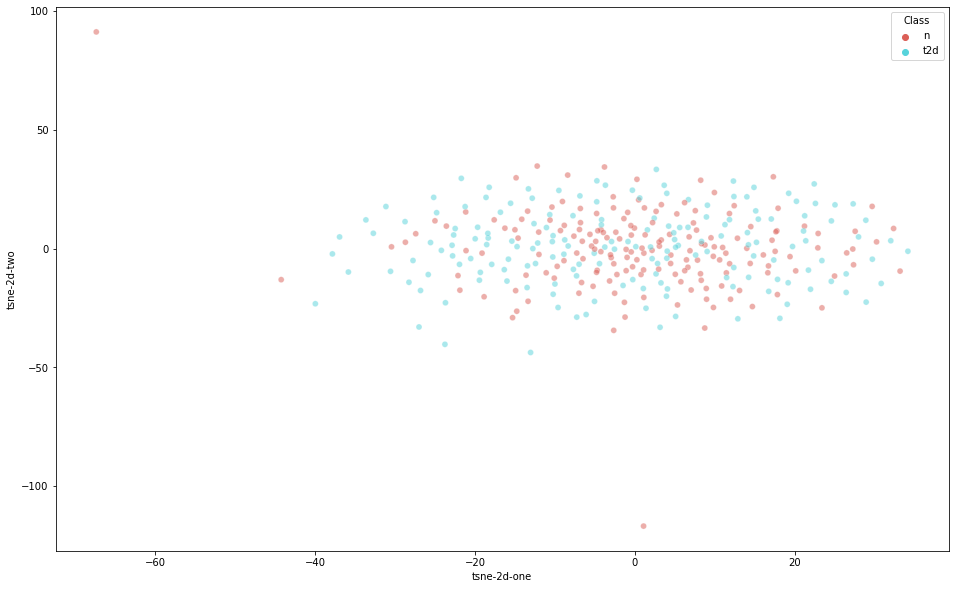

In [35]:
#plotting the visualization of 344 samples along the tsne-2d-one axis and the tsne-2d-two axis
df_microbiome['tsne-2d-one'] = tsne_results[:,0]
df_microbiome['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", n_colors=2),
    data=df_microbiome,
    legend="full",
    alpha=0.5
)

### Conclusion for t-SNE on this data set
Following are the concluding points for t-SNE on this data set:
1. The microbiome dataset had a huge number of dimensions i.e. 572 dimensions. It would have been extremely difficult to analyze the data set and also, plotting so many attributes would have been cumbersome. When a threshold value is surpassed by the number of dimensions, then the accuracy decreases. This leads to the Curse of Dimensionality.
2. To deal with the above stated issue, the approach of t-SNE helped in the reducing the dimensionality of this data set from 572 dimensions to 2 dimensions.
3. The relevant information is in the relative distances between low dimensional points. t-SNE captures structure such that the neighboring points in the input space will tend to be neighbors in the low dimensional space.
4. Since the identified clusters are almost overlapping with each other, t-SNE cannot be considered as a good approach for this data set.
5. Cluster of people can be seen according to the status of their disease i.e. red for people who don't have diabetes and blue for people who have type 2 diabetes. However, the clusters are linearly not separable as they almost overlap with each other in the 2D space. A few users from the blue and red clusters are scattered in the 2D space.

### References
1. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
2. https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
3. https://www.datacamp.com/community/tutorials/introduction-t-sne
4. https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
5. https://stats.stackexchange.com/questions/164917/should-data-be-centeredscaled-before-applying-t-sne